In [1]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
from utils import ExperimentManager

import matplotlib.pyplot as plt
import numpy as np

gcn_exp = dict(
    label = "GCN",
    collection = "rob_csbm_gcn",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
lineargcn_exp = dict(
    label="LinearGCN",
    collection="rob_csbm_lineargcn",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
sgc_exp = dict(
    label="SGC",
    collection="rob_csbm_sgc",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
appnp_exp = dict(
    label = "APPNP",
    collection = "rob_csbm_appnp",
    start_id = 181,
    end_id = 360,
    n_seeds = 10,
)
gat_exp = dict(
    label = "GAT",
    collection = "rob_csbm_gat",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
lp_exp = dict(
    label = "LP",
    collection = "rob_csbm_lp",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
gcn_lp_exp = dict(
    label = "GCN+LP",
    collection = "rob_csbm_gcn_lp",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
sgc_lp_exp = dict(
    label="SGC+LP",
    collection="rob_csbm_sgc_lp",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
lineargcn_lp_exp = dict(
    label="LinearGCN+LP",
    collection="rob_csbm_lineargcn_lp",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)
appnp_lp_exp = dict(
    label = "APPNP+LP",
    collection = "rob_csbm_appnp_lp",
    start_id = 181,
    end_id = 360,
    n_seeds = 10,
)
gat_lp_exp = dict(
    label = "GAT+LP",
    collection = "rob_csbm_gat_lp",
    start_id = 1,
    end_id = 180,
    n_seeds = 10,
)

In [3]:
#This notebook is used to analyse the over- and under-robustness of models. 
Ks = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0]

experiments = [gcn_exp,
               lineargcn_exp,
               sgc_exp,
               appnp_exp,
               gat_exp, 
               lp_exp, 
               gcn_lp_exp,
               appnp_lp_exp, 
               lineargcn_lp_exp,
               sgc_lp_exp,
               gat_lp_exp]
experiment_manager = ExperimentManager(experiments)

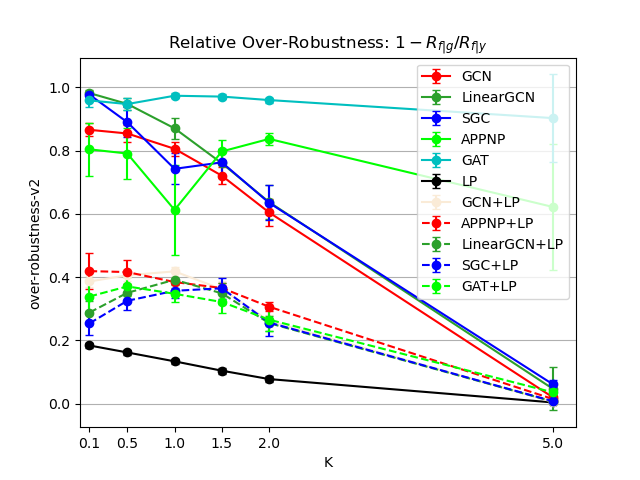

In [5]:
models = ["GCN", "APPNP", "LinearGCN", "SGC", "GAT", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP"]
title = "Relative Over-Robustness: $1 - R_{f|g} / R_{f|y}$"
experiment_manager.plot(name="over-robustness-v2", attack="l2-weak", models=models, errorbars=True, title=title)

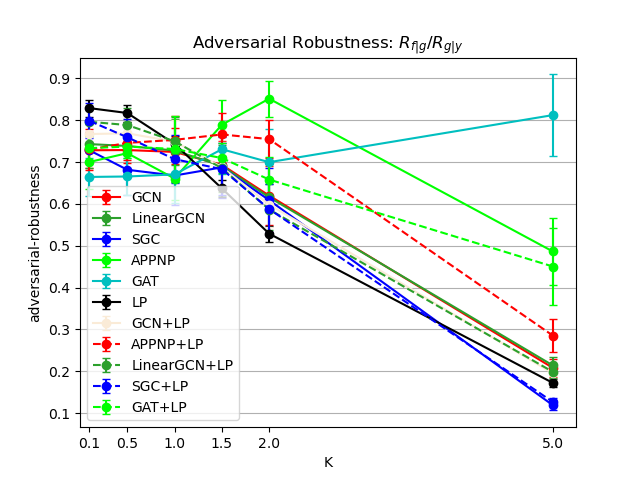

In [6]:
models = ["GCN", "APPNP", "LinearGCN", "SGC", "GAT", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP"]
title = "Adversarial Robustness: $R_{f|g} / R_{g|y}$"
experiment_manager.plot(name="adversarial-robustness", attack="l2", models=models, errorbars=True, title=title)

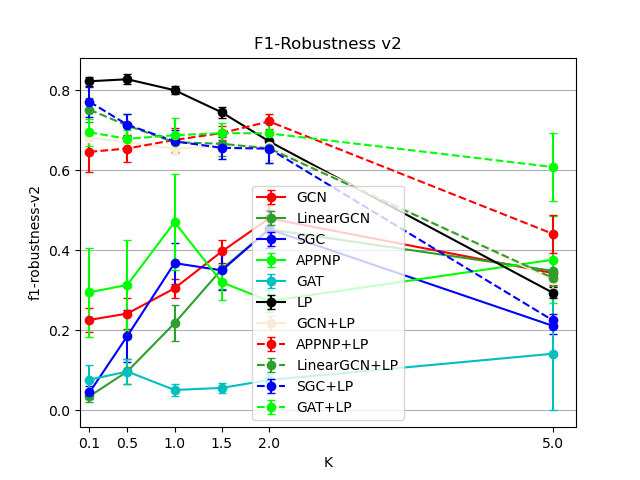

In [7]:
models = ["GCN", "APPNP", "LinearGCN", "SGC", "GAT", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP"]
#models = ["GAT"]
title = "F1-Robustness v2"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="l2", models=models, 
                           errorbars=True, title=title)

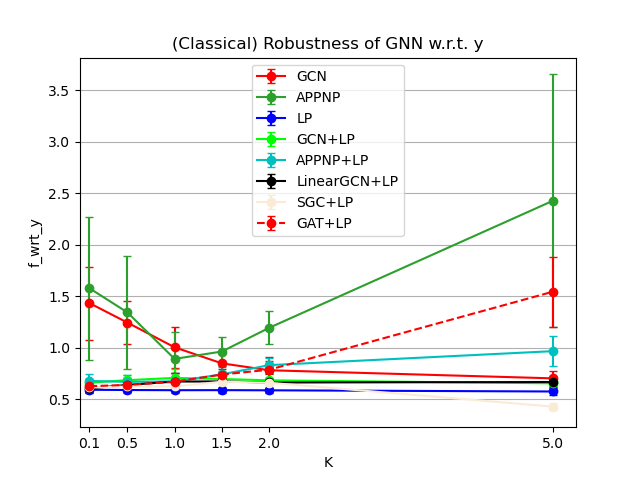

In [9]:
models = ["GCN", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP"]
title = r"(Classical) Robustness of GNN w.r.t. y"
experiment_manager.plot(name="f_wrt_y", attack="l2", models=models, errorbars=True, title=title)

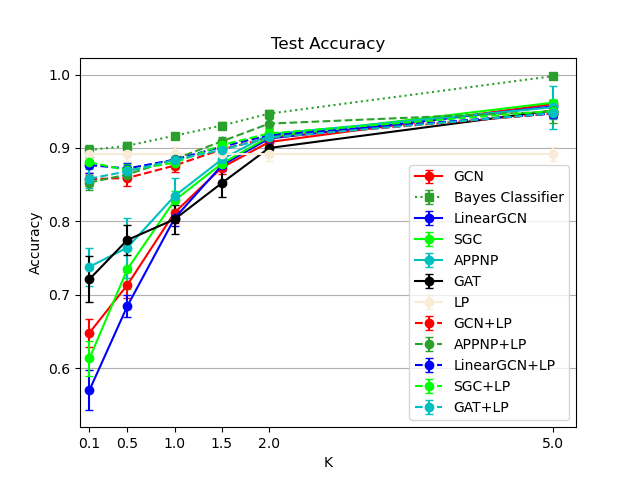

In [11]:
models = ["GCN", "APPNP", "LinearGCN", "SGC", "GAT", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP", "BC"]
title = r"Test Accuracy"
ylabel = "Accuracy"
experiment_manager.plot(name="test-accuracy", attack="l2", models=models, errorbars=True, title=title, ylabel=ylabel)

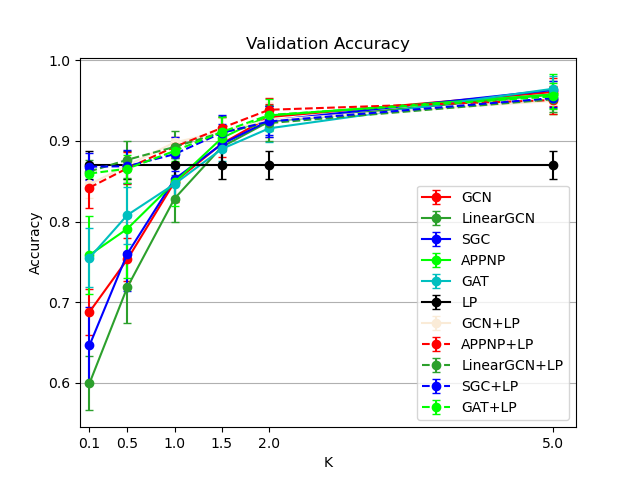

In [12]:
models = ["GCN", "APPNP", "LinearGCN", "SGC", "GAT", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "LinearGCN+LP", "SGC+LP"]
title = r"Validation Accuracy"
ylabel = "Accuracy"
experiment_manager.plot(name="validation-accuracy", attack="l2", models=models, errorbars=True, title=title, ylabel=ylabel)

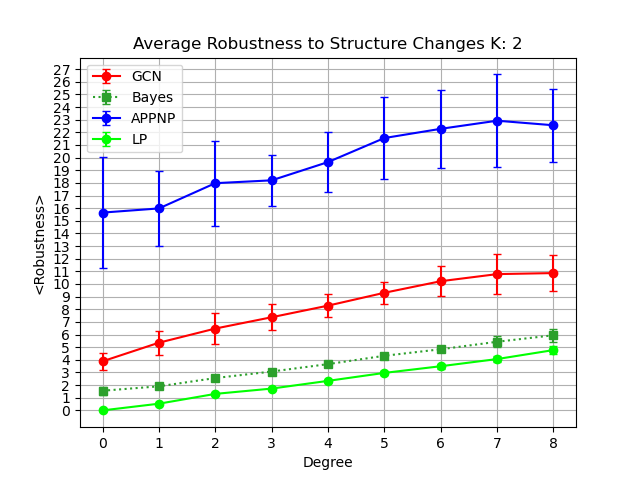

In [13]:
models = ["GCN", "APPNP", "LP"]
ylabel = "<Robustness>"
K = 2
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="f_wrt_y", attack="l2-weak", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

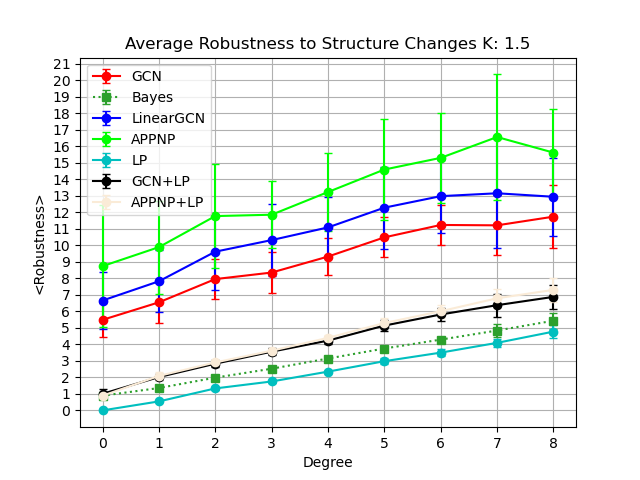

In [18]:
models = ["GCN", "APPNP", "LP", "GCN+LP", "APPNP+LP", "LinearGCN"]
ylabel = "<Robustness>"
K = 1.5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="f_wrt_y", attack="l2-weak", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

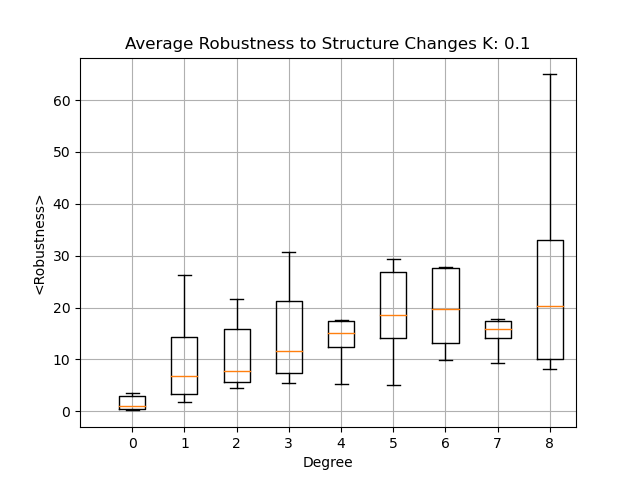

In [21]:
models = ["SGC"]
ylabel = "<Robustness>"
K = 0.1
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.boxplot_wrt_degree(name="f_wrt_y", attack="l2", models=models, K=K, max_degree = 8, errorbars=True, title=title, ylabel=ylabel)